# Clone Project Folder From GitHub

In [1]:
!git clone https://github.com/data-analytics-professionals/tweet-classification.git

fatal: destination path 'tweet-classification' already exists and is not an empty directory.


# Install Required Libraries

In [2]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-5488avef
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-5488avef
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-cp36-none-any.whl size=11742 sha256=5c1df72d63e4e41bcef259e173c37a96ec8faac663539bc1766f7b8a6af37a11
  Stored in directory: /tmp/pip-ephem-wheel-cache-6fnqim9t/wheels/a8/18/22/90afa4bd43247fb9a75b710a4a3fcd94966c022ce9e3c7d0a6
Successfully built preprocess-kgptalkie
  Found existing installation: preprocess-kgptalkie 0.1.3
    Uninstalling preprocess-kgptalkie-0.1.3:
      Successfully uninstalled preprocess-kgptalkie-0.1.3


In [3]:
!pip install spacy==2.2.3

  Using cached https://files.pythonhosted.org/packages/47/13/80ad28ef7a16e2a86d16d73e28588be5f1085afd3e85e4b9b912bd700e8a/spacy-2.2.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/07/59/6bb553bc9a5f072d3cd479fc939fea0f6f682892f1f5cff98de5c9b615bb/thinc-7.3.1-cp36-cp36m-manylinux1_x86_64.whl
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [4]:
!python -m spacy download en_core_web_sm


✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [5]:
!pip install beautifulsoup4==4.9.1


     |████████████████████████████████| 122kB 11.2MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [6]:
!pip install textblob==0.15.3

# Load All Necessary Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import preprocess_kgptalkie as kgp
import re

In [8]:
# Set seaborn settings
sns.set(rc={'figure.figsize':(20, 5)})
sns.set_theme(context='notebook', style='dark', palette='bright', font='sans-serif', font_scale=1, color_codes=True, rc=None)

from wordcloud import WordCloud

# %matplotlib inline

# Data Acquisition

In [9]:
# create pipeline with train.csv and store result in df
df = pd.read_csv("/content/tweet-classification/data/train.csv")

# Data Exploration

In [10]:
# check data within df
df.head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


In [11]:
# check shape of df
df.shape

(7613, 5)

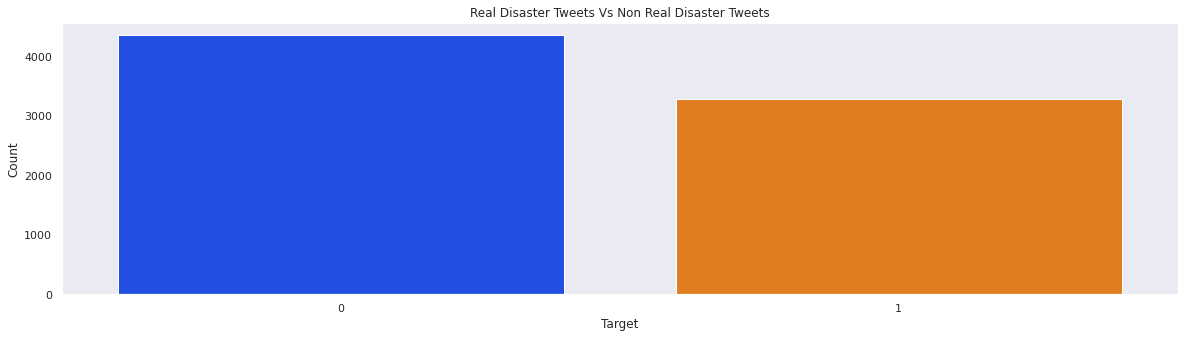

In [12]:
# Plot Count: Real Disaster Tweets Vs Non Real Disaster Tweets
sns.countplot(x='target', data=df)
plt.title('Real Disaster Tweets Vs Non Real Disaster Tweets')
plt.ylabel('Count')
plt.xlabel('Target')
plt.show()

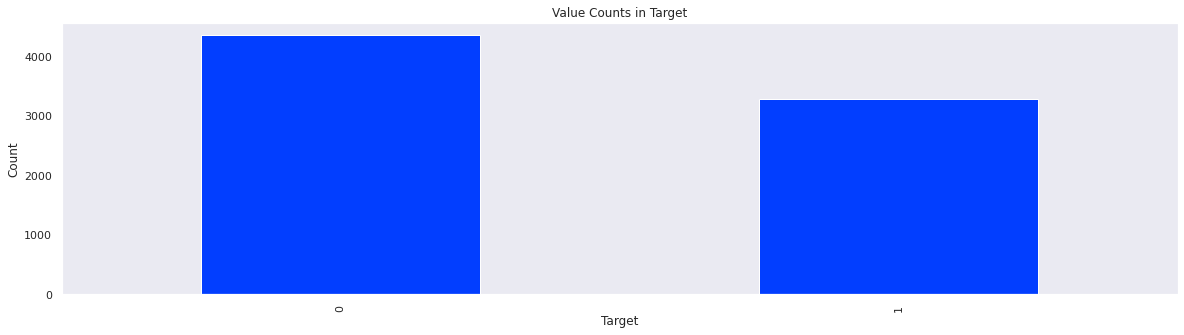

In [13]:
# Return counts of unique values within target feature.
df['target'].value_counts().plot.bar()
plt.title('Value Counts in Target')
plt.ylabel('Count')
plt.xlabel('Target')
plt.show()

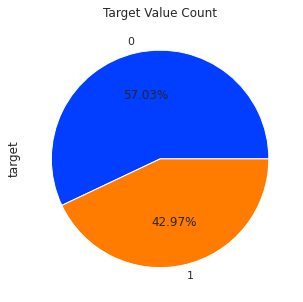

In [14]:
# Generate a pie plot for target feature.
df['target'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title('Target Value Count')
plt.show()

### Distribution in Tweets 


In [15]:
# Useful agregations from tweets 
df = kgp.get_basic_features(df)
df.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,57,13,4.384615,6,1,0,0,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,32,7,4.571429,0,0,0,1,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,112,22,5.090909,9,0,0,1,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,57,8,7.125000,1,1,0,1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,72,16,4.500000,6,2,0,0,0


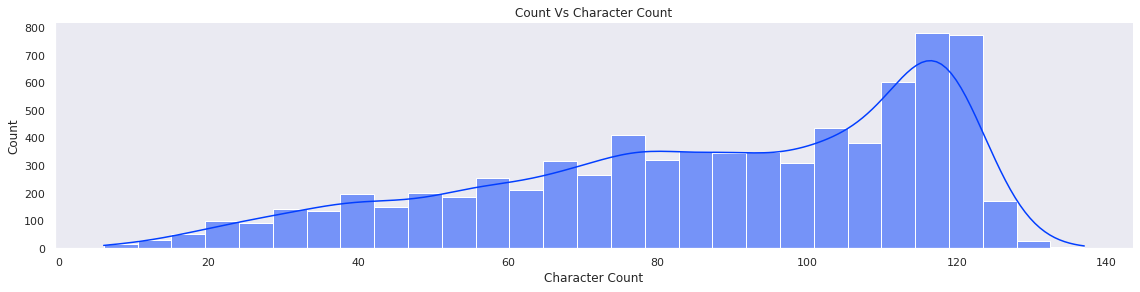

In [16]:
# Plot density distribution of a char_counts feature
sns.displot(df['char_counts'], height=4, aspect=4, kde=True)
plt.title('Count Vs Character Count')
plt.ylabel('Count')
plt.xlabel('Character Count')
plt.show()

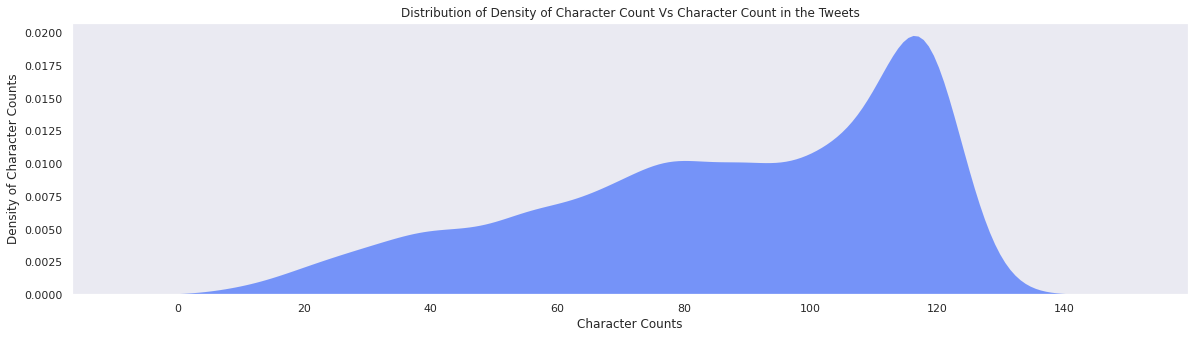

In [17]:
# Plot Kernel Density Estimate (KDE) Plot for char_counts
sns.kdeplot(df['char_counts'], shade=True, fill=True, alpha=.5, linewidth=0)
plt.title('Distribution of Density of Character Count Vs Character Count in the Tweets')
plt.ylabel('Density of Character Counts')
plt.xlabel('Character Counts')
plt.show()

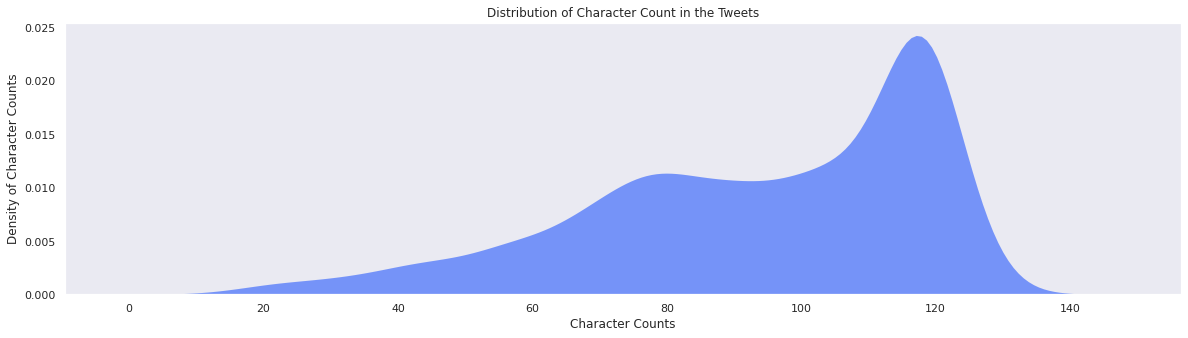

In [18]:
# Plot: Kernel Density Estimate (KDE) Plot for char_counts where target == 1
sns.kdeplot(df[df['target'] == 1]['char_counts'], shade=True, fill=True, alpha=.5, linewidth=0)
plt.title('Distribution of Character Count in the Tweets')
plt.ylabel('Density of Character Counts')
plt.xlabel('Character Counts')
plt.show()

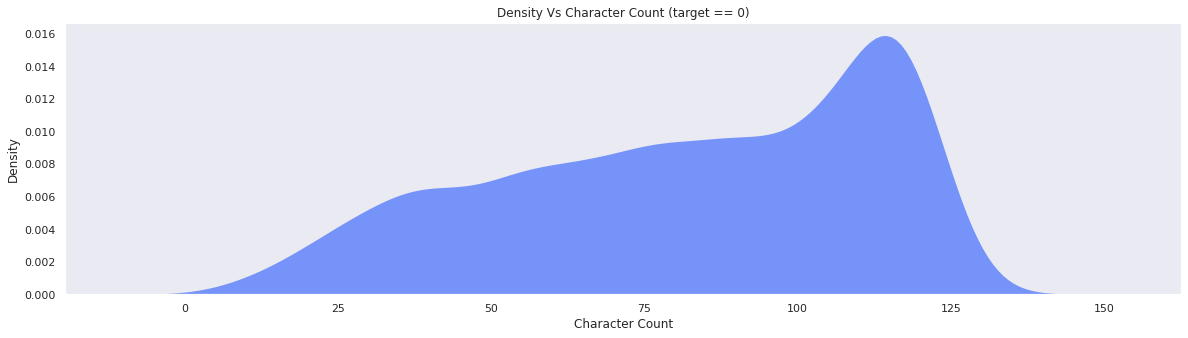

In [19]:
# Plot: Kernel Density Estimate (KDE) Plot for char_counts where target == 0
sns.kdeplot(df[df['target'] == 0]['char_counts'], shade=True, fill=True, alpha=.5, linewidth=0)
plt.title('Density Vs Character Count (target == 0)')
plt.ylabel('Density')
plt.xlabel('Character Count')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


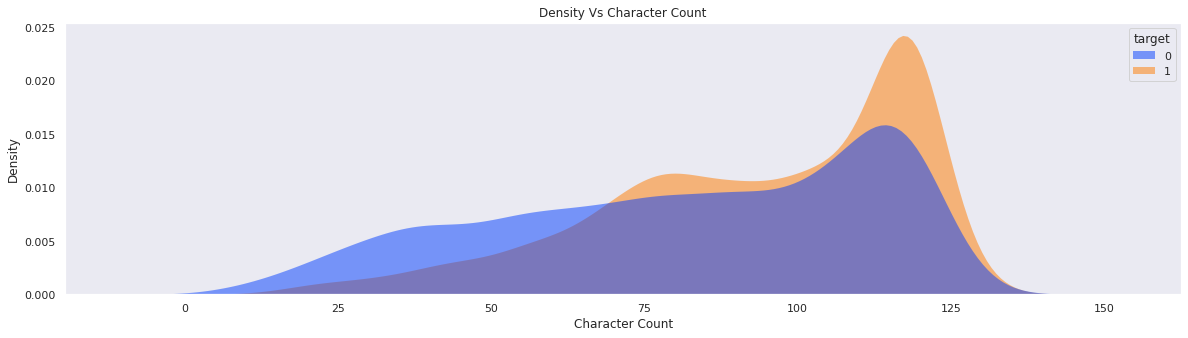

In [20]:
# Kernel Density Estimate (KDE) Plot for char_counts where target == 0 and where target == 1
sns.kdeplot(df[df['target'] == 1]['char_counts'], shade=True, color='red', hue=df['target'], fill=True, alpha=.5, linewidth=0)
sns.kdeplot(df[df['target'] == 0]['char_counts'], shade=True, color='blue', hue=df['target'], fill=True, alpha=.5, linewidth=0)
plt.title('Density Vs Character Count')
plt.ylabel('Density')
plt.xlabel('Character Count')
plt.show()

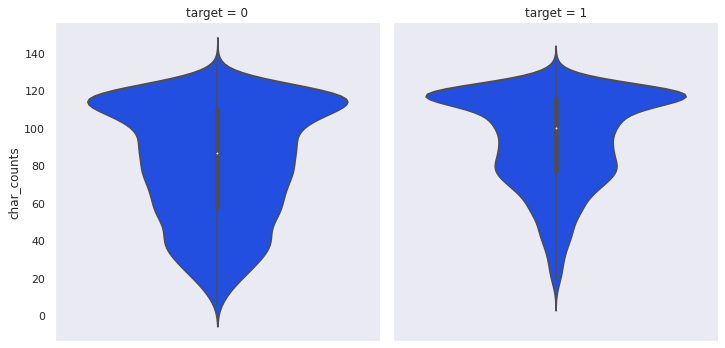

In [21]:
# Plot catplot
sns.catplot(y='char_counts', data=df, kind='violin', col='target')
plt.show()

### Number of Words, Average Words Length, and Stop Words Distribution in Tweets

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


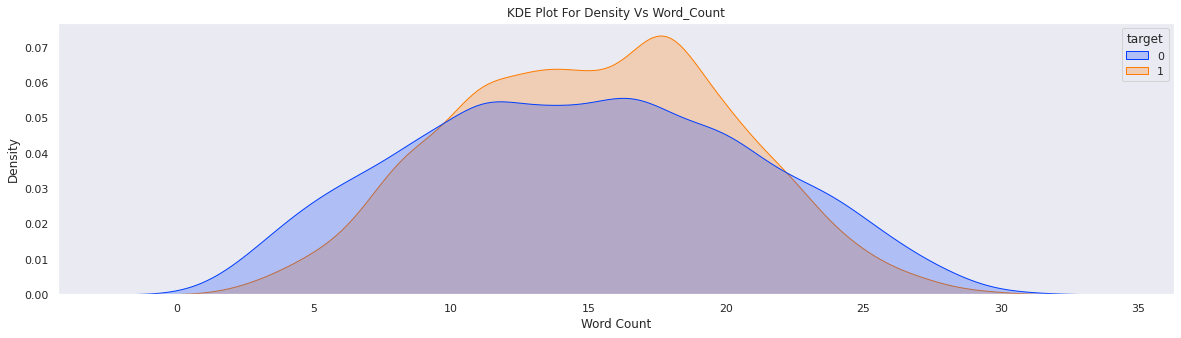

In [22]:
# Plot: Kernel Density Estimate (KDE) Plot for word_counts where target == 0 and where target == 1
sns.kdeplot(df[df['target'] == 1]['word_counts'], shade=True, color='red', hue=df['target'])
sns.kdeplot(df[df['target'] == 0]['word_counts'], shade=True, color='blue', hue=df['target'])
plt.title('KDE Plot For Density Vs Word_Count')
plt.ylabel('Density')
plt.xlabel('Word Count')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


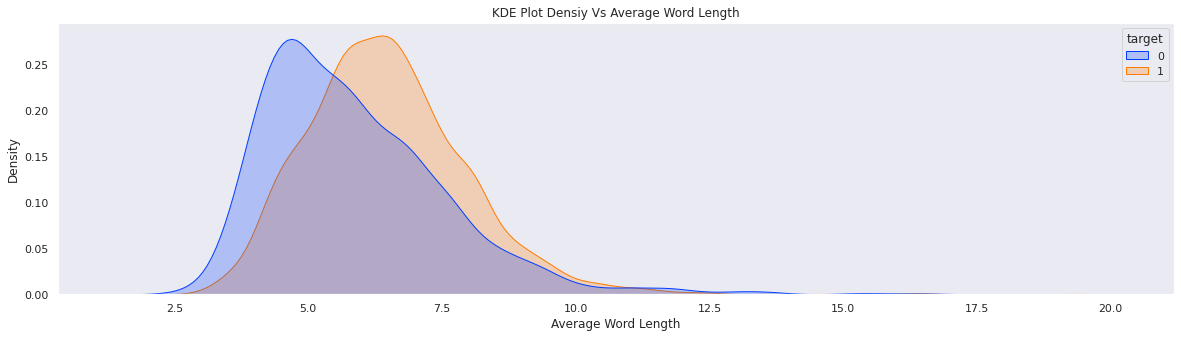

In [23]:
# Plot: Kernel Density Estimate (KDE) Plot for avg_wordlength where target == 0 and where target == 1
sns.kdeplot(df[df['target'] == 1]['avg_wordlength'], shade=True, color='red', hue=df['target'])
sns.kdeplot(df[df['target'] == 0]['avg_wordlength'], shade=True, color='blue', hue=df['target'])
plt.title('KDE Plot Densiy Vs Average Word Length')
plt.ylabel('Density')
plt.xlabel('Average Word Length')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


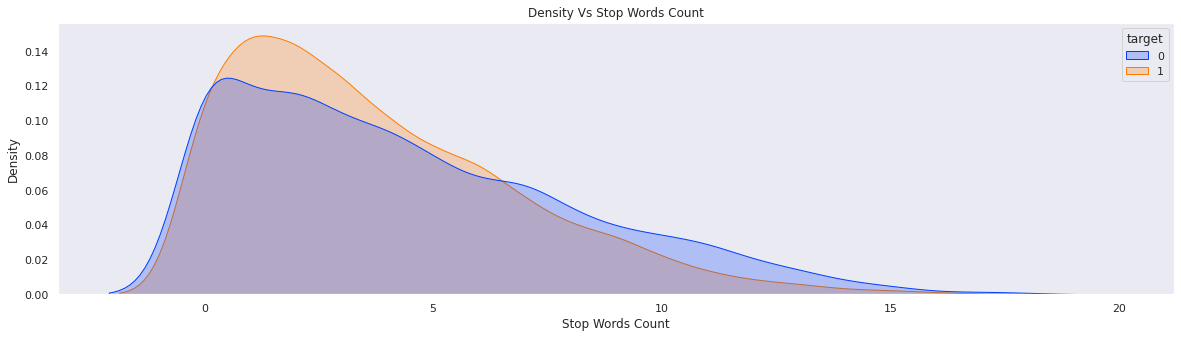

In [24]:
# PLot: Kernel Density Estimate (KDE) Plot for stopwords_counts_count where target == 0 and where target == 1
sns.kdeplot(df[df['target'] == 1]['stopwords_counts'], shade=True, color='red', hue=df['target'])
sns.kdeplot(df[df['target'] == 0]['stopwords_counts'], shade=True, color='blue', hue=df['target'])
plt.title('Density Vs Stop Words Count')
plt.ylabel('Density')
plt.xlabel('Stop Words Count')
plt.show()

# Data Exploration with N-Grams

### Frequency of Words (unigram)

In [25]:
# frequency of Words (unigram)
unigram_freq = kgp.get_word_freqs(df=df, col='text')
unigram_freq.shape

(31924,)

### Common Top 20 Unigram (one word)

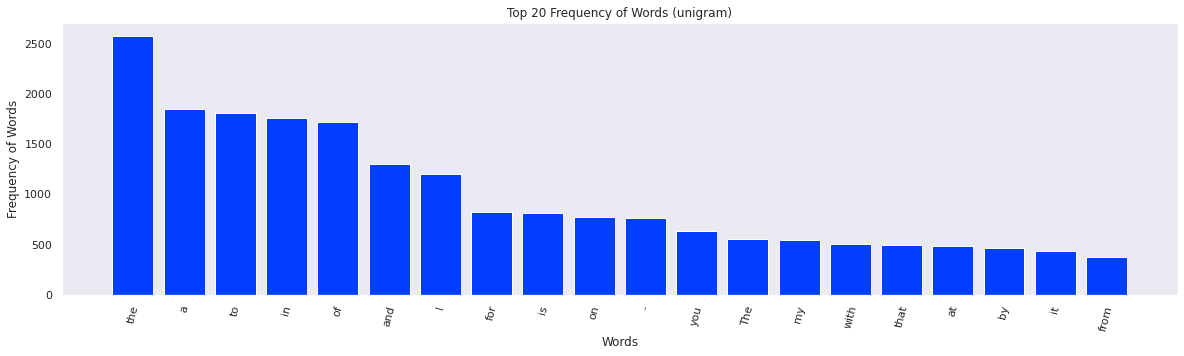

In [26]:
# 20 Top Words (unigram)
top_20_unigram_freq = unigram_freq[:20]

# Plot top_20_unigram_freq Index Vs top_20_unigram_freq Values
plt.bar(top_20_unigram_freq.index, top_20_unigram_freq.values)
plt.xticks(rotation = 75)
plt.title("Top 20 Frequency of Words (unigram)")
plt.ylabel('Frequency of Words')
plt.xlabel('Words')
plt.show()

### Unigram (one word) - Least Used Common Words (Last 20 Words in the unigram_freqs)

In [27]:
# Last 20 Words in the unigram_freqs (unigram)
least_20_unigram_freq = unigram_freq[-20:]
least_20_unigram_freq

#pod                      1
http://t.co/cyv2zG935g    1
DANGER.                   1
#MGTAB                    1
#shoalstraffic            1
100ND                     1
http://t.co/RPnEAJ6fOD    1
@DrPhil                   1
Device                    1
Namekians                 1
Wolforth                  1
mats                      1
#russia                   1
slapping                  1
#TheBachelorette          1
PUNCH                     1
#PeritoEnGrafoscopia      1
http://t.co/6WAdNmsTOv    1
bricks                    1
4:00                      1
dtype: int64

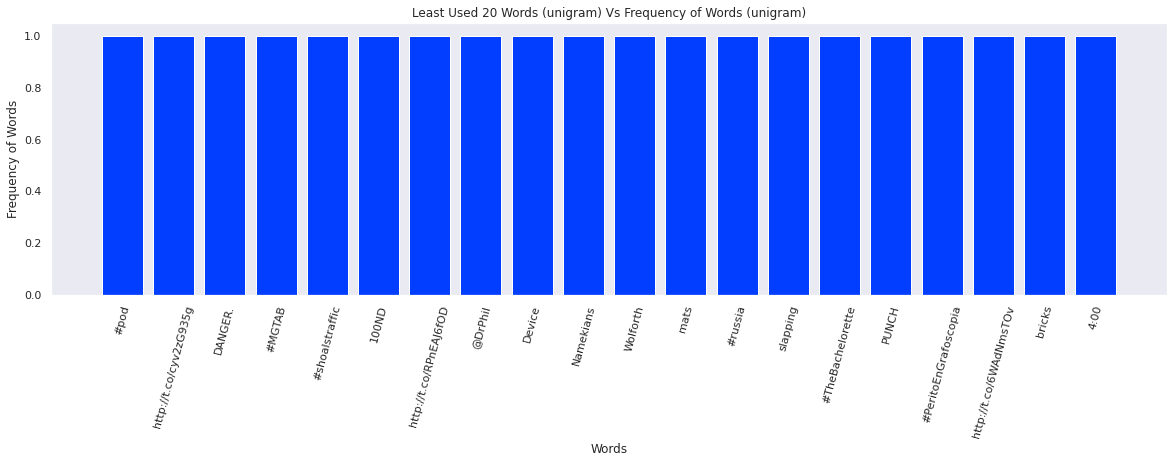

In [28]:
# Plot least_20_unigram_freq Index Vs least_20_freq_unigram_words Values
plt.bar(least_20_unigram_freq.index, least_20_unigram_freq.values)
plt.xticks(rotation = 75)
plt.title("Least Used 20 Words (unigram) Vs Frequency of Words (unigram)")
plt.ylabel('Frequency of Words')
plt.xlabel('Words')
plt.show()

### Bi-gram Tweet Analysis

In [29]:
bi_gram_freq = kgp.get_ngram(df=df, col='text', ngram_range=2)

# Common Top 20 Bi-gram (two words)
top_20_bi_gram_freq = bi_gram_freq[:20]
top_20_bi_gram_freq

[('ûówe work', 68495),
 ('ûótech business', 68494),
 ('ûónegligence and', 68493),
 ('ûókody vine', 68492),
 ('ûóher upper', 68491),
 ('ûó wallybaiter', 68490),
 ('ûó the', 68489),
 ('ûó stories', 68488),
 ('ûó rt', 68487),
 ('ûó richmond', 68486),
 ('ûó organizers', 68485),
 ('ûó oh', 68484),
 ('ûó now', 68483),
 ('ûó lol', 68482),
 ('ûó integrates', 68481),
 ('ûó https', 68480),
 ('ûó hiroshima', 68479),
 ('ûó head', 68478),
 ('ûó eh', 68477),
 ('ûó desolation', 68476)]

# Data Cleaning

In [30]:
# Function to clean tweets data
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ').replace('.', ' ')
    x = kgp.cont_exp(x)
    x = kgp.remove_emails(x)
    x = kgp.remove_urls(x)
    x = kgp.remove_html_tags(x)
    x = kgp.remove_rt(x)
    x = kgp.remove_accented_chars(x)
    x = kgp.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [31]:
df['text'] = df['text'].apply(lambda x: get_clean(x))
df.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,57,13,4.384615,6,1,0,0,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1,32,7,4.571429,0,0,0,1,0
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,112,22,5.090909,9,0,0,1,0
3,6,NaN,NaN,130 people receive wildfires evacuation orders...,1,57,8,7.125000,1,1,0,1,0
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,72,16,4.500000,6,2,0,0,0


# Tweet Visualisation - Real Disaster Tweets

In [32]:
real_disaster_tweets = kgp.get_word_freqs(df=df[df["target"]==1], col="text")
real_disaster_tweets = " ".join(real_disaster_tweets.index)
real_disaster_tweets

'httpt the in of a to and is on for i at by from it that with not you after this fire was are as have my news httpst over up more via disaster an were be people california suicide has no police who but when been like killed do 2 will just hiroshima than so fires out storm crash families we train now about into emergency s your bomb buildings there all what two mh370 am they attack nuclear video wildfire accident get one bombing new northern minister how prime burning dead legionnaires me bomber if some homes war car atomic still obama fatal he years off forest collapse us may city watch debris retweet japan first today malaysia 1 latest mass or man severe near water had those confirmed before earthquake oil would found floods world spill 70 army down home under warning 4 injured derailment evacuation could outbreak 3 weather wreckage saudi thunderstorm 40 being migrants old our investigators can say during flooding flood missing their bridge time death mosque back state her suspect wou

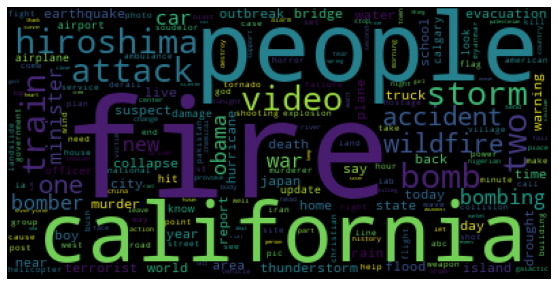

In [33]:
# Create WordCloud instance word_cloud
word_cloud = WordCloud(max_font_size=100)

# Generate word cloud
word_cloud.generate(real_disaster_tweets)

# Plot Words
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

# Tweet Visualisation - Non Real Disaster Tweets

In [35]:
non_real_disaster_tweets = kgp.get_word_freqs(df=df[df["target"] == 0], col="text")
non_real_disaster_tweets = " ".join(non_real_disaster_tweets.index)
non_real_disaster_tweets

'the httpt i a to and of is in you my it for not on that with this have be am httpst are do me out your like so by at just was but will up all he if from new as get they has we or no when now about what would an how one can there body people 2 via her been his video into more loud us know love back time why got off full emergency them after see who day going 3 youtube cannot did still some fire let good go she think had want laughing man our ass should world over retweet then way life their youre first work burning too last need only make really news than god because best even much many here being take content help could him right wreck say 5 were feel its black today great hot please never im look fucking every 4 down 1 cross fear before ever read bags oh fuck night top does reddit come these bag without year everyone getting any another liked ruin head screaming may panic bloody shit death wrecked bad always u smoke face harm most buildings crash disaster explode coming school well w

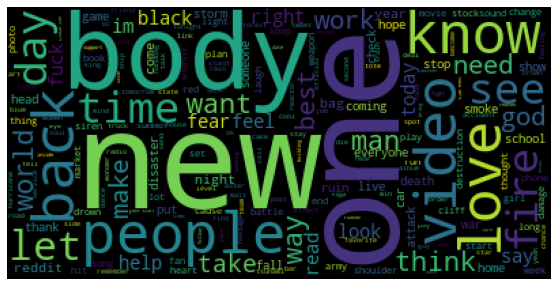

In [36]:
# Create WordCloud instance word_cloud
word_cloud = WordCloud(max_font_size=100)

# Generate word_cloud 
word_cloud.generate(non_real_disaster_tweets)

# Plot Words
plt.imshow(word_cloud)
plt.axis("off")
plt.show()